# Customer bank churn project

The dataset consists of a randomly sampled population of a banking customers detailing demographics (independent variables) and whether a customer left (or stayed) the bank within the last 6 months (dependent variable).
Project goal is to predict  whether will customer leave or not.

## Data exploring

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import cm

In [2]:
df=pd.read_csv("Churn-Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Column information:

- RowNumber - number of rows
- CustomerId - customer id number
- Surname - customer's surname
- CreditScore - number between 300–850 that depicts a consumer's creditworthiness. The higher the score, the better a borrower looks to potential lenders
- Geography - customer's state
- Gender - female/male
- Age - customer's age
- Tenure - period or duration for which the loan amount is sanctioned
- Balance - the amount of money held in a bank account at a given moment
- NumOfProducts - number any facilities or services related to cash management, including treasury, depository, overdraft, credit or debit card, purchase card, electronic funds transfer and other cash management arrangements
- HasCrCard - 1-has credit card ,0 - hasn't credit card
- IsActiveMember - 1 - is active member , 0 - is not active member
- EstimatedSalary - estimated salary
- Exited - 1 - customer left , 0 - customer  stayed


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 976.6+ KB


We dont have any missing values. But we do have columns that we don't need like "RowNumber", "CustomerId","Surname" so we will just drop them and also  we will rename some of columns name for better understanding.


In [4]:
df2=df.drop(["RowNumber","CustomerId","Surname"],axis=1)

In [5]:
#Renaming columns
df2.columns=['credit_score', 'state', 'gender', 'age', 'tenure', 'balance',
       'number_of_products', 'credit_card', 'active_member', 'estimated_salary',
       'churn']

In [6]:
df2.head()

,credit_score,state,gender,age,tenure,balance,number_of_products,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Data visualization

### Balance column

We want to see how many customers leave depend on their amount of money in bank account.

In [7]:
#balance of customers which are not leaving
balance_churn_no=df2[df2.churn==0].balance

In [8]:
#balance of customers which are  leaving
balance_churn_yes=df2[df2.churn==1].balance

Text(0, 0.5, 'Number of customers')

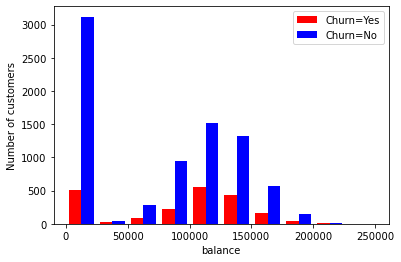

In [9]:
#Plot histogram
plt.hist([balance_churn_yes, balance_churn_no], color=['red', 'blue'], label=['Churn=Yes', 'Churn=No'])
plt.legend()

plt.xlabel('balance')
plt.ylabel('Number of customers')

As we can see that over 3000 customers hasn't left even though they don't have no money in bank account. We also see that he most customers left  with no money and around 100 000$.

### Tenure column

We want to see if customers with longer tenure would stay and vice versa.

In [10]:
#tenure of customers which are not leaving
tenure_churn_no=df2[df2.churn==0].tenure

In [11]:
#tenure of customers whicht are not leaving
tenure_churn_yes=df2[df2.churn==1].tenure

Text(0, 0.5, 'Number of customers')

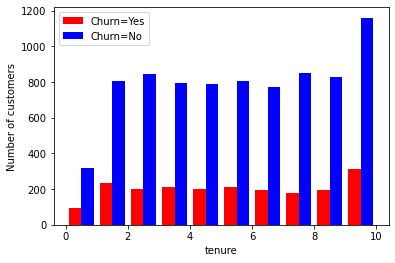

In [12]:
#Plot histogram
plt.hist([tenure_churn_yes, tenure_churn_no], color=['red', 'blue'], label=['Churn=Yes', 'Churn=No'])
plt.legend()

plt.xlabel('tenure')
plt.ylabel('Number of customers')

As we could assume the customers with longer tenure have stayed. 

### Gender column

Let's see how many females and males are leaving and how many are staying.

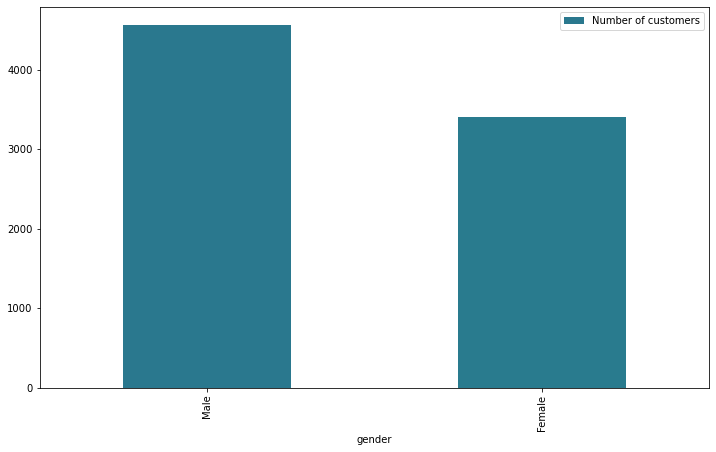

In [13]:
# Count how many females and males stayed
count_churn=df2.groupby('gender')['churn'].apply(lambda x: (x==0).sum()).reset_index(name='Number of customers')

color = cm.viridis(np.linspace(.4, .8, 30))

count_churn= count_churn.sort_values("Number of customers" , ascending=[False])
count_churn.plot.bar(x='gender', y='Number of customers', color=color , figsize=(12,7))

We can see that more males have stayed then females.

### Age column

Let's see how ages affects on staying or leaving.

In [14]:
#age of customers which are not leaving
age_churn_no=df2[df2.churn==0].age

In [15]:
#age of customers which are not leaving
age_churn_yes=df2[df2.churn==1].age

Text(0, 0.5, 'Number of customers')

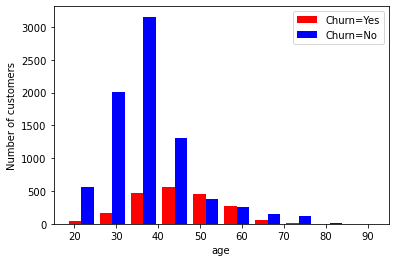

In [16]:
#plot histogram
plt.hist([age_churn_yes, age_churn_no], color=['red', 'blue'], label=['Churn=Yes', 'Churn=No'])
plt.legend()

plt.xlabel('age')
plt.ylabel('Number of customers')

We can see that the  customer between 30 and 40 years old  are staying.

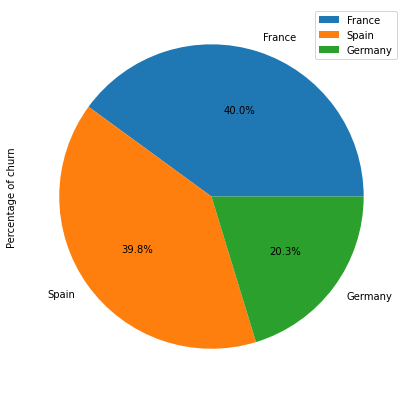

In [17]:
# Count percentage of churns by state
count_churn=df2.groupby('state')['churn'].apply(lambda x: (x==1).sum()).reset_index(name='Percentage of churn')
count_churn= count_churn.sort_values("Percentage of churn" , ascending=[False])
count_churn.plot.pie(x="state",y='Percentage of churn', autopct='%1.1f%%',labels=df2["state"].unique(),figsize=(10,7))



We can see that France and Spain have the most customers that left.

## Preparing dataset for model

In [18]:
df2.head()

,credit_score,state,gender,age,tenure,balance,number_of_products,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [19]:
# define a function to discover columns with categorical varibales

def discover_categorical_columns(df):
    """
    This function takes dataframe as an input, goes through columns in a dataframe to check if column is of an object type.
    If the colunm is of an object type it means column contains categorical variables. Function than prints all unique 
    categorical values of a column
    
    Args: 
        df (pd.DataFrame) - only requried argument for the function
        
    Returns:
        Prints unique categorical values for object type columns.
    """
    for column in df:
        if df[column].dtype=='object':
            print('{} : {}'.format(column, df[column].unique()))

In [20]:
discover_categorical_columns(df2)

state : ['France' 'Spain' 'Germany']
gender : ['Female' 'Male']


We only have 2 object type columns with maximum 3 unique values. We can  replace 'Female' and 'Male' categorical values of 'gender' column to 1's and 0's. And for "state" column we will use pd.get_dummies()

In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   credit_score        10000 non-null  int64  
 1   state               10000 non-null  object 
 2   gender              10000 non-null  object 
 3   age                 10000 non-null  int64  
 4   tenure              10000 non-null  int64  
 5   balance             10000 non-null  float64
 6   number_of_products  10000 non-null  int64  
 7   credit_card         10000 non-null  int64  
 8   active_member       10000 non-null  int64  
 9   estimated_salary    10000 non-null  float64
 10  churn               10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 781.3+ KB


In [22]:
# replace 'Female' with 1; replace 'Male' with 0
df2.replace({'Female':1, 'Male':0}, value=None, inplace=True)

In [23]:
#function for creating dummy column
def create_dummies(df,column_name):
    dummies=pd.get_dummies(df[column_name],prefix=column_name)
    df=pd.concat([df,dummies],axis=1)
    return df

In [24]:
#dummy columns
df3=create_dummies(df2,"state")
df4=df3.drop(["state"],axis=1)

In [25]:
df4.head()

,credit_score,gender,age,tenure,balance,number_of_products,credit_card,active_member,estimated_salary,churn,state_France,state_Germany,state_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1


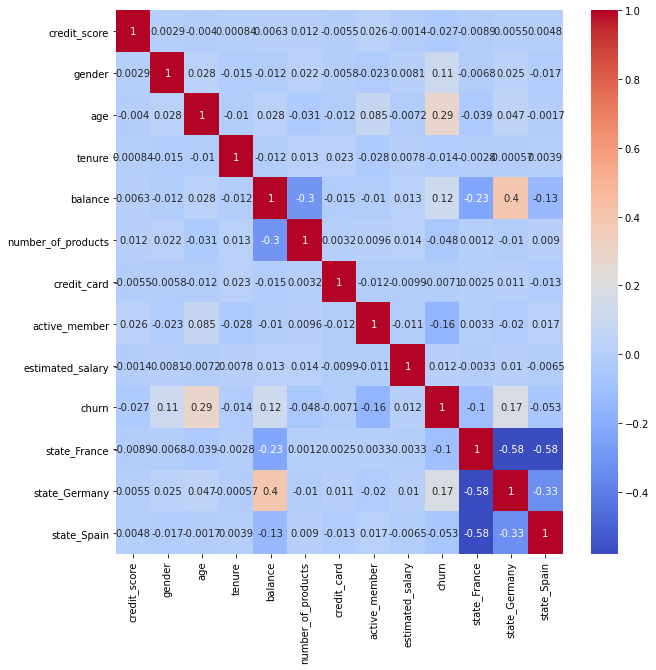

In [26]:
# visualizing correlations 
plt.figure(figsize=(10,10))
sns.heatmap(df4.corr(), annot=True, cmap='coolwarm')

Everything look fine and we can now scale data for better result.

### Scaling data

In [27]:
# min-max scaling
from sklearn.preprocessing import MinMaxScaler, RobustScaler

scaler=MinMaxScaler()

In [28]:
data_scaled_array=scaler.fit_transform(df4)

In [29]:
df5=pd.DataFrame(data_scaled_array, columns=df4.columns)
df5.head()

,credit_score,gender,age,tenure,balance,number_of_products,credit_card,active_member,estimated_salary,churn,state_France,state_Germany,state_Spain
0,0.538,1.0,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1.0,1.0,0.0,0.0
1,0.516,1.0,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0,0.0,0.0,1.0
2,0.304,1.0,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1.0,1.0,0.0,0.0
3,0.698,1.0,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0.0,1.0,0.0,0.0
4,1.000,1.0,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0,0.0,0.0,1.0


## Building Models

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
# Defining features and  target column
X = df5.drop(columns='churn', axis ='columns')
y = df5.churn

In [32]:
#Splitting our data on train and test
train_X,test_X,train_y,test_y=train_test_split(X,y,train_size=0.8,random_state=1)

### Balance data

In [33]:
train_y.value_counts()

0.0    6378
1.0    1622
Name: churn, dtype: int64

As we can see we have a lot more customers that are staying then that are leaving. Because of this we need to equalize those parameters to get better result. We will use SMOTE technique.
MOTE (Synthetic Minority Oversampling TEchnique) consists of synthesizing elements for the minority class, based on those that already exist. It works randomly picingk a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

In [34]:
#Importing SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')      
X_s, y_s = smote.fit_sample(X, y)

In [35]:
# check value counts
y_s.value_counts()

0.0    7963
1.0    7963
Name: churn, dtype: int64

As we can see our target column is now balanced. So we can now build our models.

In [36]:
#Splitting our data on train and test
train_X, test_X, train_y,test_y = train_test_split(X_s, y_s, test_size=0.2, random_state=15, stratify=y_s)

In [37]:
train_y.value_counts()

1.0    6370
0.0    6370
Name: churn, dtype: int64

###  Random Forest classifier model

In [38]:
# Importing RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

In [98]:
#Defining model
rf=RandomForestClassifier(n_estimators=200, random_state=1, min_samples_leaf=2)

In [99]:
# Fitting the model
rf.fit(train_X,train_y)

RandomForestClassifier(min_samples_leaf=2, n_estimators=200, random_state=1)

In [100]:
# predicting values on test set
predictions_rf=rf.predict(test_X)

###  Random Forest classifier accuracy

In [101]:
#Importing cross_val_score and accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [102]:
# calculating accuracy with accuracy_score()
accuracy_rf=accuracy_score(test_y, predictions_rf)
accuracy_rf

0.8948524795982423

In [44]:
# calculating accuracy result with cross_val_score()
accuracy_cross_val_rf=cross_val_score(rf, X_s, y_s, cv=10)
accuracy_cross_val_rf

array([0.82234777, 0.82234777, 0.85624608, 0.92780917, 0.90960452,
       0.92718142, 0.91645729, 0.92336683, 0.91959799, 0.91017588])

In [45]:
#calculating cross_val_score mean
accuracy_cross_val_rf=np.mean(accuracy_cross_val_rf)
accuracy_cross_val_rf

0.8935134713113589

### Calculating  f-1 score in RandomForest model

In [46]:
#Importing classification_report
from sklearn.metrics import classification_report

In [47]:
print(classification_report(test_y,predictions_rf))

              precision    recall  f1-score   support

         0.0       0.90      0.89      0.89      1593
         1.0       0.89      0.90      0.90      1593

    accuracy                           0.89      3186
   macro avg       0.89      0.89      0.89      3186
weighted avg       0.89      0.89      0.89      3186



We can see that our model can accurately predict 90% of churns.

### Artificial neural networks model

In [91]:
# import MLPClassifier and make an instance 
from sklearn.neural_network import MLPClassifier

In [92]:
# Defining our model
mlp=MLPClassifier(hidden_layer_sizes=(10,10), activation="relu",max_iter=1000)

In [93]:
# fitting the model
mlp.fit(train_X, train_y)

MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000)

In [94]:
# predicting values on test set
predictions_mlp=mlp.predict(test_X)

### Artificial neural networks accuracy

In [95]:
# calculating accuracy with accuracy_score()
accuracy_mlp=accuracy_score(test_y, predictions_mlp)
accuracy_mlp

0.8214061519146265

In [53]:
# calculating accuracy result with cross_val_score()
accuracy_cross_val_mlp=cross_val_score(mlp, X_s, y_s, cv=10)
accuracy_cross_val_mlp

array([0.77966102, 0.78468299, 0.79723792, 0.82234777, 0.81042059,
       0.80225989, 0.80025126, 0.81092965, 0.8071608 , 0.79396985])

In [54]:
#calculating cross_val_score mean
accuracy_cross_val_mlp=np.mean(accuracy_cross_val_mlp)
accuracy_cross_val_mlp

0.8008921727280469

### Calculating  f-1 score in Artifical Neural networks

In [55]:
print(classification_report(test_y,predictions_mlp))

              precision    recall  f1-score   support

         0.0       0.78      0.83      0.80      1593
         1.0       0.82      0.77      0.79      1593

    accuracy                           0.80      3186
   macro avg       0.80      0.80      0.80      3186
weighted avg       0.80      0.80      0.80      3186



Artificial Neural network model can accurately predict 82% of churns.

# Results

|    Model                 | Accuracy_score | Cross_val_score|
|--------------------------|----------------|----------------|
|RandomForest              |     89.5 %     |       89.4 %   |
|Artificial Neural network |     82.1 %     |       80.1 %   |
